<a href="https://colab.research.google.com/github/AlexeyTri/MedSeminars_spring/blob/master/seminar1/%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D1%8B%D0%B5_%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D1%8F_%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D1%8B_%D0%BF%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4%D0%BD%D1%8B%D1%85_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## СЕМИНАРСКАЯ ЧАСТЬ: Основные понятия и примеры прикладных задач

Загрузка библиотек

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
import os

In [ ]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !wget -q -O IRIS.csv https://raw.githubusercontent.com/AlexeyTri/MedSeminars_spring/master/seminar1/Iris.csv

In [ ]:
!wget -q -O sample_data/iRIS.csv https://raw.githubusercontent.com/AlexeyTri/MedSeminars_spring/master/seminar1/Iris.csv

Загрузка выборки - ИРИСЫ ФИШЕРА

In [ ]:
dataset = pd.read_csv('/content/sample_data/iRIS.csv')

In [ ]:
dataset.sample(5, random_state=42)

,sepal.length,sepal.width,petal.length,petal.width,variety
73,6.1,2.8,4.7,1.2,Versicolor
18,5.7,3.8,1.7,0.3,Setosa
118,7.7,2.6,6.9,2.3,Virginica
78,6.0,2.9,4.5,1.5,Versicolor
76,6.8,2.8,4.8,1.4,Versicolor


In [ ]:
np.unique(dataset['variety'])

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

# Работа с данными



1.   проанализировать множество объектов: размер выборки, определить признаки, которыми описываются объекты
2.   определить множество ответов
3.   определить тип задачи машинного обучение (инструмент решения)
4.   определить пайплайн задачи: предобработка данных, структура модели, обучение, контроль качества



## множество объектов:

в данной задаче множество объектов описывается 4 признаки => n=4


1.   длина чашелистика
2.   ширина чашелистика
3.   длина лепестка
4.   ширина лепестка



* все признаки являются вещественными признаками. Формально объекты $Х$ представляются в следующем виде:
\begin{align}
 X \in ℝ ^{l 𝗑 n}
\end{align}

$l$ - число объектов,
$n$ - число признаков,
$X$ - вещественая матрица размера $l 𝗑 n$

In [ ]:
print('Размер выборки составляет l={} объектов'.format(len(dataset)))

Размер выборки составляет l=150 объектов


## множество ответов

в данной задаче множество ответов состоит из трех элементов


```
np.unique(dataset['variety'])
array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)
```



## задача машинного обучения

в данном случае, так как мощность множества $|y| =3 << l = 150$ получаем задачу классификации на $M = 3$ класса

## анализ данных

спроектируем все объекты на двумерные плоскости

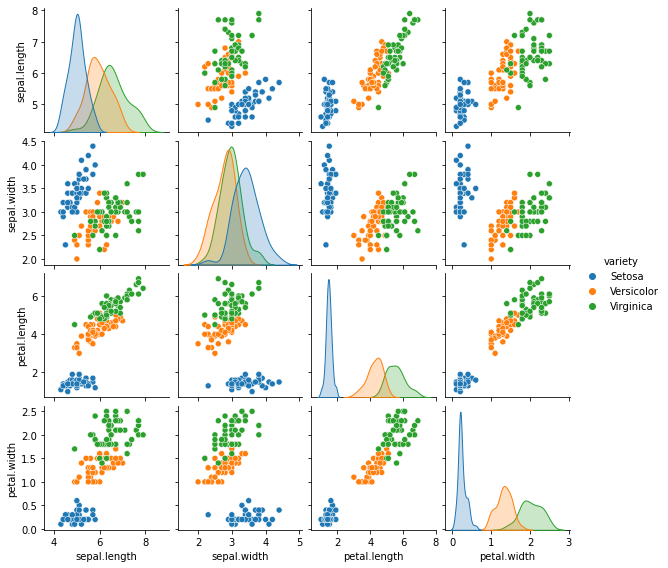

In [ ]:
sns.pairplot(dataset, hue='variety', height=2)
plt.show()

класс $Setosa$ существенно отделяется от двух других. При этом множество элементов двух других классов расположены так, что позволяет нам провести разделяющую плоскость

# Построение модели

## предобработка данных

* приведем задачу к задаче бинарной классификации, а менно ярко выраженный класс Setosa
* закодируем классы множеством ${\{-1, +1}\}$

In [ ]:
binary_dataset = dataset.drop(index=dataset.index[dataset['variety'] == 'Setosa'])

In [ ]:
binary_dataset.loc[dataset['variety'] == 'Versicolor', dataset.columns == 'variety'] = -1
binary_dataset.loc[dataset['variety'] == 'Virginica', dataset.columns == 'variety'] = +1

## модель алгоритмов

* **${𝓕}$**- модель алгоритмов в машинном обучении это множество параметрических функций, которые действуют из множества объектов в множество ответов:

\begin{align}
 {𝓕} = \{ f|f : ℝ ^{n} ⟶ \{-1,+1\}, {ограничения}\}
\end{align}

---



Пример параметрического семейства функций для задач бинайрной классификации - линейный классификатор:
\begin{align}
 {𝓕} = \{ f(θ, x) = sign(θ^{ᵀ} x)|θ\inℝ^{n}\}
\end{align}



* **функция потерь**

ML это всегда выбо функции из множества ${𝓕}$. Критерий выбора функционал ${ℒ}$, который каждой  $f\in {𝓕}$ ставит в соответствие число из $ℝ_{+}$. В общем случае функционал можно представить в следующем виде:
\begin{align}
 {ℒ}(f,X,y) = \sum_{i=1}^l q(f, x_{i}, y_{i})
\end{align}

$q$ - функция ошибки на объекте $x$

${ℒ}$ - эмперический риск


* оптимизационная задача
\begin{align}
    \hat{f}  = argmin_{f\in{𝓕}}{ℒ}(f,X,y)
\end{align}

❗ значение ${\hat{f}}$ зависит от выборки $(X, y)$, то есть на разных наборах данных оптимальныая функция будет разная


функционал качества нашего примера

\begin{align}
 {ℒ}(f,X,y) = \sum_{i=1}^l \left[f(θ, x) \ne y_{i} \right]
\end{align}

оптимизационная задача



\begin{align}
\hat\theta = argmin_{\theta\in{ℝ ^{n}}}\sum_{i=1}^l \left[f(θ, x) \ne y_{i} \right]
\end{align}

**поиск параметра $\hat\theta$ и есть решение оптимизационной задачи, для каждого класса** 



# Решение

## поиск оптимального вектора параметров

* вектор параметров, МАКСИМАЛЬНО разделяющий простарнства признаков обоих классов

1. $X \in ℝ ^{l 𝗑 (n+1)}$, +1 это параметр $w_0$ в уравнении построения плоскости
2. $y \in \{-1,+1\}$ 

In [ ]:
X = binary_dataset.iloc[:, binary_dataset.columns != 'variety'].values
y = binary_dataset.iloc[:, binary_dataset.columns == 'variety'].values.reshape(-1)
X = np.array(np.hstack([X, np.ones([len(X), 1])]), dtype=np.float64)
y = np.array(y, dtype=np.float64)

In [ ]:
model = LogisticRegression(random_state=0, max_iter=20)
_ = model.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.predict_proba(X)

In [ ]:
model.coef_

array([[-0.43215421, -0.43128572,  2.36090069,  2.6390892 , -0.69452208]])

## перейдем к решению многоклассовой задачи

* LOO - один против всех

### генерация синтетической выборки

In [ ]:
np.random.seed(0)
l = 100
n = 2
X1 = np.array([-1, -1]) + 0.5*np.random.randn(l, n)
X2 = np.array([1, 1]) + 0.5*np.random.randn(l, n)
X3 = np.array([-1, 1]) + 0.5*np.random.randn(l, n)

X = np.vstack([X1, X2, X3])
y = np.hstack([[0]*l, [1]*l, [2]*l])

In [ ]:
X = np.hstack([X, np.ones([len(X), 1])])

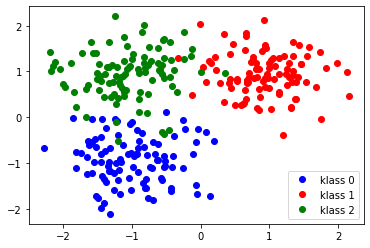

In [ ]:
cols = ['blue', 'red', 'green']

for k in np.unique(y):
    plt.plot(X[y==k,0], X[y==k, 1], 'o', label='klass {}'.format(k), color=cols[k])

plt.legend(loc='best')
plt.show()

## ОДИН ПРОТИВ ВСЕХ

данный метод построен на том,что нужно построить $M$ линейных классификаторов, которые классфицируют $k$-й класс против всех остальных классов

In [ ]:
models = []
model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y==0, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y==1, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y==2, dtype=np.int64))
models.append(model)

In [ ]:
models[0].coef_

array([[-8.11241775e-01, -4.11735152e+00,  2.95360566e-06]])

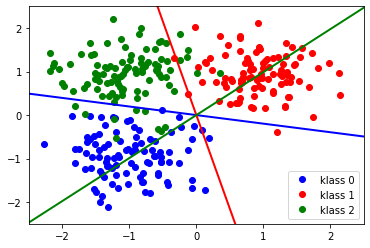

In [ ]:
cols = ['blue', 'red', 'green']
plt.xlim((-2.5,2.5))
plt.ylim((-2.5,2.5))

for k in np.unique(y):
    plt.plot(X[y==k,0], X[y==k, 1], 'o', label='klass {}'.format(k), color=cols[k])

for k in np.unique(y):
    #рассчитываем координаты вектора номали к прямой

    x2, y2 = - models[k].coef_[0][1]/models[k].coef_[0][0], 1

    #задаем уравнение прямой в виде полинома 1-й степени, расчет коэффициентов полинома np.polyfit, формула самого полинома np.poly1d
    #то есть на выходе получили уравнение прямой
    polinomial = np.poly1d(np.polyfit([0, x2], [0, y2],1))
    # поиграть степенями полинома, получить кривые
    x_axis = np.linspace(-10, 10)
    y_axis = polinomial(x_axis)
    plt.plot(x_axis, y_axis, linewidth=2, color=cols[k])

plt.legend(loc='best')
plt.show()

* ДЗ

In [ ]:
def get_line(a, b, c=0, x_min=-10, x_max=10):
    x1, y1 = (-b + c)/a, -1
    x2, y2 = (b + c)/a, 1
    
    polynomial = np.poly1d(np.polyfit([x1, x2], [y1, y2], 1))
    x_axis = np.linspace(x_min, x_max)
    y_axis = polynomial(x_axis)
    
    return x_axis, y_axis

In [ ]:
models = []
model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==0, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==1, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==2, dtype=np.int64))
models.append(model)

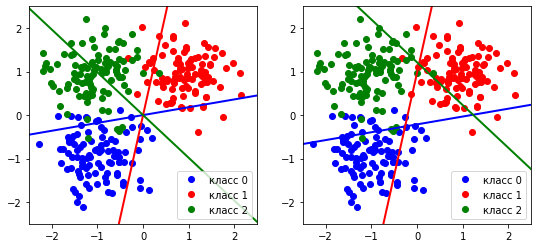

In [ ]:
from matplotlib import gridspec
cols = ['blue', 'red', 'green']
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))
    ax[i].set_xlim((-2.5, 2.5)), ax[i].set_ylim((-2.5, 2.5))

for k in np.unique(y):
    ax[0].plot(X[y==k,0], X[y==k,1], 'o', 
               label='класс {}'.format(k), color=cols[k])
    ax[1].plot(X[y==k,0], X[y==k,1], 'o', 
               label='класс {}'.format(k), color=cols[k])

for k in np.unique(y):
    ax[0].plot(*get_line(*models[k].coef_[0][:2]), linewidth=2, color=cols[k])
    ax[1].plot(*get_line(*models[k].coef_[0]), linewidth=2, color=cols[k])

ax[0].legend(loc='best'), ax[1].legend(loc='best')
plt.show()

## методы анализа качества

* подсчет ошибок неверных классов

\begin{align}
 {ℒ}(f,X,y) = \sum_{i=1}^l \left[f(θ, x_i) \ne y_{i} \right]
\end{align}

* данную формулу хорошо представить в виде матрицы попарных ошибок

\begin{array}{cccс}
 &         y=1&y=2&y=3\\
---&---&---&---\\
f(x)=1&    1-1 & 1-2 & 1-3 \\
f(x)=2&    2-1 & 2-2 & 2-3 \\
f(x)=3&    3-1 & 3-2 & 3-3 \\
\end{array}


2-3 это число, которое обозначает, сколько объектов класса 2 было отнесено к классу 3

In [ ]:
scores = np.zeros([3,3])
for k in range(3):
    pred = np.argmax(np.vstack([models[i].predict_proba(X[y==k])[:,1] for i in range(3)]).T, axis=1)
    for i in  range(3):
        scores[i,k] = sum(pred==i)

In [ ]:
scores

array([[97.,  0.,  6.],
       [ 0., 98.,  2.],
       [ 3.,  2., 92.]])

Вывод: хуже всего отделим класс 3, что видно по графику

❗ Задача решена - мы выявили обощающую способность, а именно расчитали коэффициенты скалярного произведения, которые с разной степенью вероятности определяют класс элемента выборки

# Переобучение и контроль качества

* для контроля переобучения модели, всю выборку делят на обучающую, валидационную (разные наборы данных) и тестовую -> обучение модели проходит на обучающей (в нашем случае расчет коээфициентов), а контроль обощающей способности протекает на тестовой выборке

\begin{align}
X_{tr} \in ℝ ^{l_{tr} 𝗑 n} &, y_{tr}\in 𝕐^{l_{tr}}\\\\
X_{vl} \in ℝ ^{l_{vl} 𝗑 n} &, y_{vl}\in 𝕐^{l_{vl}}\\\\
X_{ts} \in ℝ ^{l_{ts} 𝗑 n} &, y_{ts}\in 𝕐^{l_{ts}}\\\\
\hat\theta = argmin_{\theta\in{ℝ ^{n}}}{ℒ}(\theta,X_{tr},y_{tr})\\
\end{align}

## пример переобучения

In [ ]:
np.random.seed(0)
l = 6
n = 1
w = np.random.randn(n)
X_tr = np.random.randn(l, n)
y_tr = X_tr @ w + np.random.randn(l)

X_vl = np.random.randn(l,n)
y_vl = X_vl @ w + np.random.randn(l)

X_ts = np.random.randn(l,n)
y_ts = X_ts @ w + np.random.randn(l)

In [ ]:
x_begin = -1.5
x_end = 2.5
X_polinom = np.hstack([X_tr**0, X_tr**1, X_tr**2, X_tr**3, X_tr**4, X_tr**5])
w_polinom = np.linalg.inv(X_polinom.T@X_polinom)@X_polinom.T@y_tr
y_polinom = list(map(lambda x: np.array([x**0,x**1,x**2,x**3,x**4,x**5])@w_polinom, np.linspace(x_begin,x_end)))

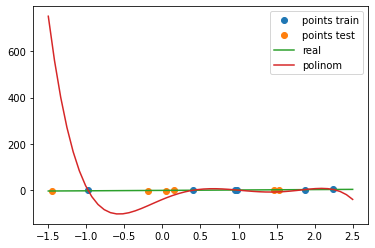

In [ ]:
plt.plot(X_tr, y_tr, 'o', label='points train')
plt.plot(X_ts, y_ts, 'o', label='points test')
plt.plot(np.linspace(x_begin, x_end), w*np.linspace(x_begin, x_end), '-', label='real')
plt.plot(np.linspace(x_begin, x_end), y_polinom, '-', label='polinom')

plt.legend(loc='best')
plt.show()

## борьба с переобучением

* изменение структуры модели
* добавление регляризаторов
* ...

для выбора гиперпараметров пользуются методами Cross-validation и Leave One Out-LOO

## LOO

\begin{align}
 {LOO}(\mu, X_{tr},y_{tr},X_{vl},y_{vl}) = \sum_{i=1}^{l_{tr}+l_{vl}} q(\hatθ(X_{tr}\cup X_{vl} ∖ x_{i}, μ), x_{i}, y_{i})
\end{align}

$x_{i}$ - это элемент объединенного датасета $tr$ и $vl$

\begin{align}
\hatμ &= argmin {LOO}(\mu, X_{tr},y_{tr},X_{vl},y_{vl})\\ 
\hatθ &= \hatθ(X_{tr}\cup X_{vl}, \hatμ)
\end{align}


## СВОИМИ РУКАМИ + ДЗ

LinearRegression

In [1]:
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

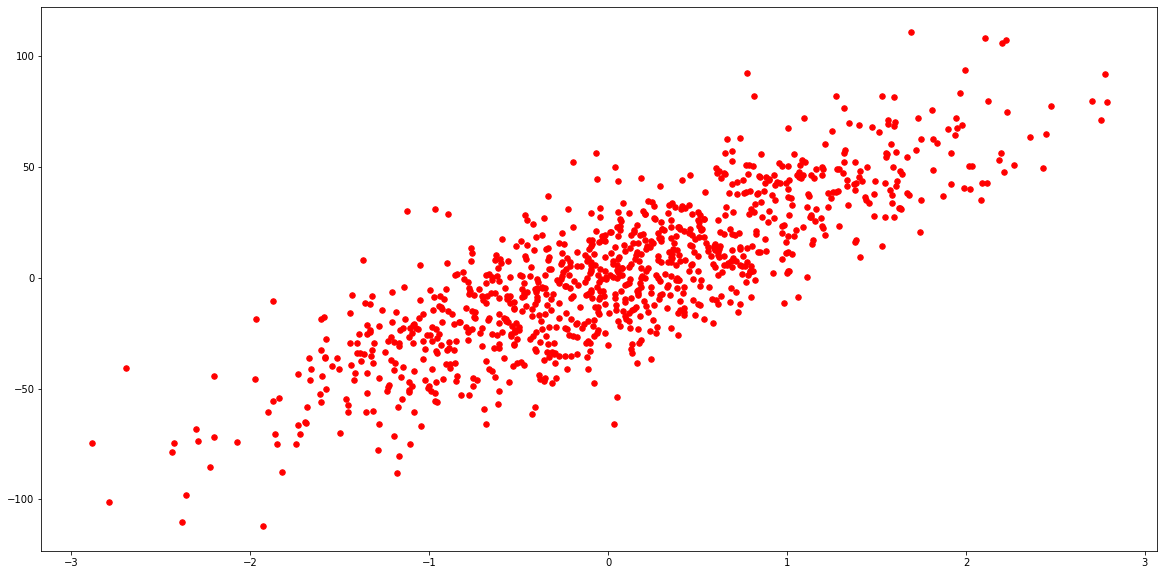

In [4]:
X, y = datasets.make_regression(n_samples=1000, n_features=1, noise=20, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
# y_regressor = LR.predict(X)
plt.figure(figsize=(20,10))
plt.scatter(X[:, 0], y, c='r', marker='o', s = 30)
# plt.plot(X, y_regressor, color='black')
plt.show()

In [7]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.y = y
        self.weights = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.b

            dw = (1/n_samples) * np.dot(X.T, (y_pred - self.y))
            db = (1/n_samples) * np.sum(y_pred - self.y)

            self.weights -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return(np.dot(X, self.weights) + self.b)  

In [16]:
def MSE(x1, x2):
    return(np.sqrt((x1-x2)**2).mean())

In [8]:
LR = LinearRegression(lr=0.01)

In [9]:
LR.fit(X_train, y_train)

In [10]:
predict = LR.predict(X_test)

In [17]:
MSE(predict, y_test)

16.135761723812024

LogisticRegression

In [18]:
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [19]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.y = y
        self.weights = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.b
            y_pred = self._sigmoid(linear_model)

            dw = (1/n_samples) * np.dot(X.T, (y_pred - self.y))
            db = (1/n_samples) * np.sum(y_pred - self.y)

            self.weights -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.b
        y_pred = self._sigmoid(linear_model)
        y_pred_cls = [1 if i>0.5 else 0 for i in y_pred]
        return np.array(y_pred_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))   

In [20]:
def accuracy(x1, x2):
    return(np.sum(x1 == x2)/len(x2))

In [21]:
bs = datasets.load_breast_cancer()
X, y = bs.data, bs.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [22]:
LR = LogisticRegression(lr=0.001)

In [ ]:
LR.fit(X_train, y_train)

In [ ]:
accuracy(LR.predict(X_test), y_test)

ДЗ повторить код семинара на классах hande made